# Trasforming and Augmenting Images
- reference 
    - https://towardsdatascience.com/a-comprehensive-guide-to-image-augmentation-using-pytorch-fb162f2444be
    - https://www.kaggle.com/code/ayushnitb/cifar10-robust4layer-convnet-pytorch-85-acc
- resize : height, width 줄일 때 사용
- gray sclae : RGB 채널을 다루기 어려울 때 사용
- normalize : 모델의 연산속도를 올리는 데 사용
- centercrop : 뒤의 배경이 클 때 가운데 잘라서 사용함.
- gaussian blur : 이미지를 덜 뚜렷하고 구분하기 어렵게 만들 때 사용. 샘플의 패턴을 robust하게 학습하는 데에 도움을 줌.

In [219]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np

from torchvision import transforms, datasets
import torchvision.transforms.functional as F

In [2]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

In [5]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('data/SurfaceCrack/Negative/00026.jpg'))
torch.manual_seed(0)
data_path = 'data/SurfaceCrack/'
diz_class = {'Positive':'Crack','Negative':'No crack'}

In [43]:
IMAGE_SIZE = 32

mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]
# These values are mostly used by researchers as found to very useful in fast convergence


# https://pytorch.org/vision/stable/transforms.html
# We can try various transformation for good generalization of model
train_transform = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), # Resize the image in a 32X32 shape
                                     transforms.RandomRotation(20), # Randomly rotate some images by 20 degrees
                                     transforms.RandomHorizontalFlip(0.1), # Randomly horizontal flip the images
                                     transforms.ColorJitter(brightness = 0.1, # Randomly adjust color jitter of the images
                                                            contrast = 0.1, 
                                                            saturation = 0.1), 
                                     transforms.RandomAdjustSharpness(sharpness_factor = 2,
                                                                      p = 0.1), # Randomly adjust sharpness
                                     transforms.ToTensor(),   # Converting image to tensor
                                     transforms.Normalize(mean, std), # Normalizing with standard mean and standard deviation
                                     transforms.RandomErasing(p=0.75,scale=(0.02, 0.1),value=1.0, inplace=False)])

test_transform = transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

In [196]:
# Load the data and transform the dataset
train_dataset =  datasets.CIFAR10(root='./data', train=True, download=True, transform = train_transform)
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform = test_transform)

# Create train and validation batch for training
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100)

Files already downloaded and verified
Files already downloaded and verified


In [197]:
def show_data(imgs):
    if type(imgs) != list :
        imgs = [imgs]
    try:
        fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
        for i, img in enumerate(imgs):
            img = img.permute(1,2,0)
            axs[0, i].imshow(img)
            axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    except Exception as e:
        print(e)   
    plt.show()
    
# We need to convert the images to numpy arrays as tensors are not compatible with matplotlib.
def im_convert(tensor):
    #Lets
    img = tensor.cpu().clone().detach().numpy() #tensor -> numpy 바꾸는 과정
    img = img.transpose(1, 2, 0)
    img = img * np.array(tuple(mean)) + np.array(tuple(std))
    img = img.clip(0, 1) # Clipping the size to print the images later (0보다 작은 값은 0으로 1보다 큰 값은 1로)
    return img

In [198]:
train_dataset[8]

(tensor([[[-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466],
          [-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466],
          [-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466],
          ...,
          [-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466],
          [-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466],
          [-1.8466, -1.8466, -1.8466,  ..., -1.8466, -1.8466, -1.8466]],
 
         [[-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391],
          [-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391],
          [-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391],
          ...,
          [-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391],
          [-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391],
          [-1.8391, -1.8391, -1.8391,  ..., -1.8391, -1.8391, -1.8391]],
 
         [[-1.5755, -1.5755, -1.5755,  ..., -1.5755, -1.5755, -1.5755],
          [-1.5755, -1.5755,

In [199]:
train_dataset[8][0].size()

torch.Size([3, 32, 32])

In [200]:
orig_img = train_dataset[8][0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


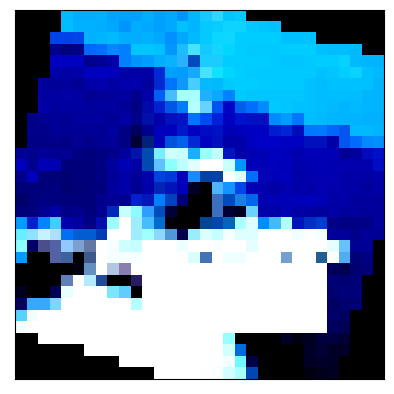

In [201]:
show_data(train_dataset[8][0])

In [138]:
train_dataset[8][0].shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


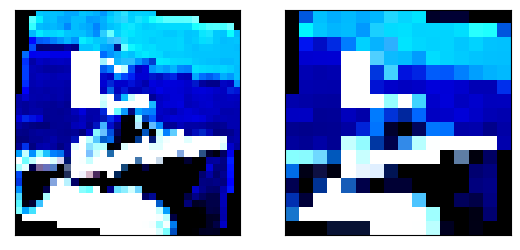

In [202]:
# 사진의 크기가 너무 큰 경우, dimension을 줄여줘야할 필요가 있음. 
# (227,227) -> (32,32), (128,128)로 줄여서 비교해보자.
resize_imgs = transforms.Resize(size=16)(orig_img)
show_data([orig_img, resize_imgs])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


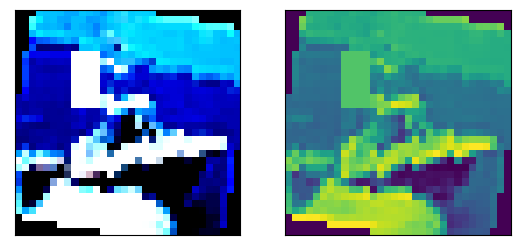

In [203]:
gray_img = transforms.Grayscale()(orig_img)
show_data([orig_img, gray_img])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


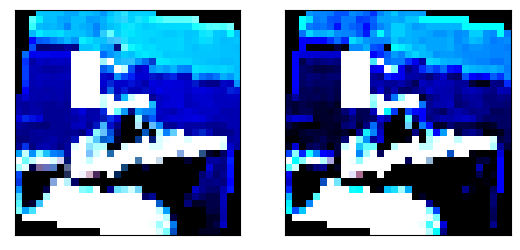

In [204]:
# normalize : model 연산 속도 올리는 데에 유용
normalized_img = transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))(orig_img)
#normalized_img = [transforms.ToPILImage()(normalized_img)]
show_data([orig_img, normalized_img])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


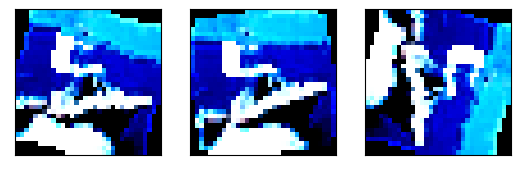

In [205]:
rotated_imgs = [transforms.RandomRotation(degrees=d)(orig_img) for d in range(50,151,50)]
show_data(rotated_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


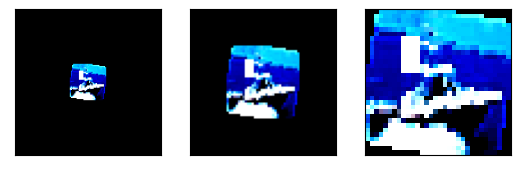

In [206]:
center_crops = [transforms.CenterCrop(size=size)(orig_img) for size in (128,64, 32)]
show_data(center_crops)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


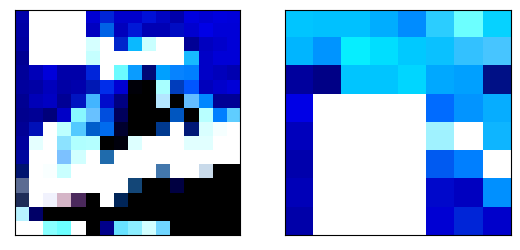

In [207]:
random_crops = [transforms.RandomCrop(size=size)(orig_img) for size in (16, 8)]
show_data(random_crops)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


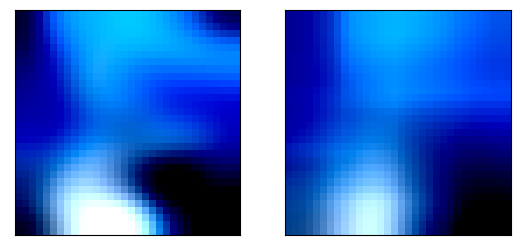

In [208]:
blurred_imgs = [T.GaussianBlur(kernel_size=(15, 21), sigma=sigma)(orig_img) for sigma in (3,7)] #kernel size : positive, odd value
show_data(blurred_imgs)

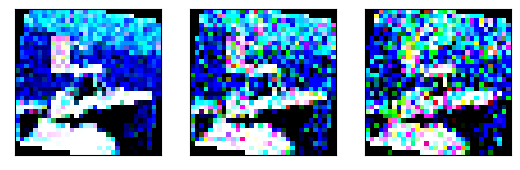

In [209]:
def add_noise(img, noise_factor=0.3): # noise_factor가 높을수록 noise를 강하게 주는 것
    noisy = img + torch.randn_like(img) *  noise_factor #torch.randn_like : 정규분포의 그래프상 랜덤한 값으로 초기화
    noisy = torch.clip(noisy, 0., 1.)
    return noisy

noise_imgs = [add_noise(orig_img, noise_factor) for noise_factor in [0.3, 0.6, 0.9]]
show_data(noise_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


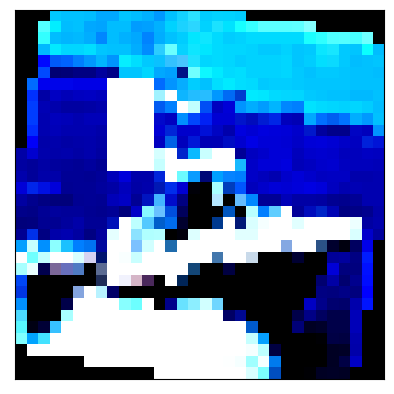

In [215]:
def add_random_patch(img, n_k, size=2):
    h, w = size, size
    img_size = img.size()[1]
    patched_img = torch.Tensor(img)
    boxes = []
    for k in range(n_k):
        y, x = np.random.randint(0, img_size-w, (2,))
        patched_img[y:y+h, x:x+w] = 0
        boxes.append((x,y,h,w))
    return patched_img

random_patched_img = add_random_patch(orig_img,10,2)
show_data(random_patched_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


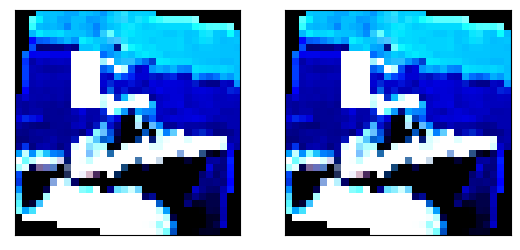

In [214]:
def add_central_region(img,size):
    h,w = size,size
    img_size = img.size()[1] 
    patched_img = torch.Tensor(img)
    patched_img[int(img_size/2-h):int(img_size/2+h),int(img_size/2-w):int(img_size/2+w)] = 0
    #img = torch.Tensor(img)
    return patched_img

central_imgs = [add_central_region(orig_img,size=s) for s in (1,4)]
show_data(central_imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


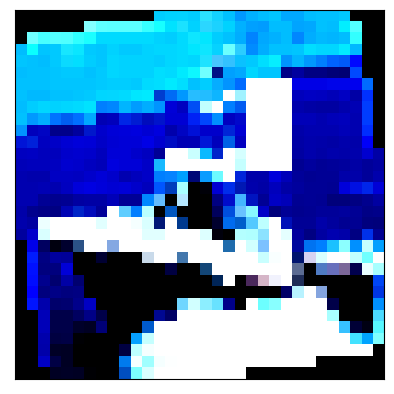

In [228]:
horizontalflip_img = transforms.RandomHorizontalFlip(p = 0.7)(orig_img)
show_data(horizontalflip_img)